problem statment 

My goal will be to use the additional data about the number of tests performed in each country to estimate the true death rate of COVID-19 and examine the relationship with age .(Consider the both files for understanding the scenario.)

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# worldometer_snapshots_April18_to_May18.csv
# population_structure_by_age_per_contry.csv
covidData=pd.read_csv('worldometer_snapshots_April18_to_May18.csv')
covid_age_Country=pd.read_csv('population_structure_by_age_per_contry.csv')

covidData

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [3]:
covidData.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [4]:
covidData['Country'].nunique()



213

In [5]:
covidData.nunique()

Date                     31
Country                 213
Population              213
Total Tests            3173
Total Cases            3257
Total Deaths           1185
Total Recovered        2268
Serious or Critical     529
Active Cases           2680
dtype: int64

In [6]:
# Total Tests =Total Cases
covidData['Total Tests']= covidData['Total Tests'].fillna(covidData['Total Cases'].astype(float)  if covidData['Total Cases'].notnull().any() ==True else 0     )

In [7]:
# Total Recovered ='Total Cases'-'Active Cases
covidData['Total Recovered']=covidData['Total Recovered'].fillna(0 if covidData['Total Cases'].any()==covidData['Active Cases'].any() else 0)

In [8]:
# Serious or Critical null fill with zero
covidData['Serious or Critical']=covidData['Serious or Critical'].fillna(0 )

In [9]:
# Active Cases
covidData['Active Cases']=covidData['Active Cases'].fillna(covidData['Total Cases']-covidData['Total Recovered']-covidData['Serious or Critical']-covidData['Total Deaths'])

In [10]:
# Total Deaths='Total Cases'-'Total Recovered'-Serious or Critical-Active CasesActive Cases
covidData['Total Deaths']=covidData['Total Deaths'].fillna(covidData['Total Cases']-covidData['Total Recovered']-covidData['Serious or Critical']-covidData['Active Cases'])

In [11]:
covidData

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,0.0,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,6.0,6.0,0.0,6.0,0.0,0.0
6599,2020-05-18,Western Sahara,595462,6.0,6.0,0.0,6.0,0.0,0.0
6600,2020-05-18,Anguilla,14987,3.0,3.0,0.0,3.0,0.0,0.0
6601,2020-05-18,Lesotho,2140235,1.0,1.0,0.0,0.0,0.0,1.0


In [12]:
covidData.isnull().sum()

Date                    0
Country                 0
Population              0
Total Tests            49
Total Cases            49
Total Deaths           49
Total Recovered         0
Serious or Critical     0
Active Cases           49
dtype: int64

In [13]:
covidData[covidData['Total Tests'].isnull()]

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
85,2020-04-18,Tajikistan,9510530,NaN,NaN,NaN,0.0,0.0,NaN
200,2020-04-18,Comoros,867268,NaN,NaN,NaN,0.0,0.0,NaN
211,2020-04-18,Lesotho,2140235,NaN,NaN,NaN,0.0,0.0,NaN
298,2020-04-19,Tajikistan,9510530,NaN,NaN,NaN,0.0,0.0,NaN
413,2020-04-19,Comoros,867268,NaN,NaN,NaN,0.0,0.0,NaN
424,2020-04-19,Lesotho,2140235,NaN,NaN,NaN,0.0,0.0,NaN
511,2020-04-20,Tajikistan,9510530,NaN,NaN,NaN,0.0,0.0,NaN
626,2020-04-20,Comoros,867268,NaN,NaN,NaN,0.0,0.0,NaN
637,2020-04-20,Lesotho,2140235,NaN,NaN,NaN,0.0,0.0,NaN
724,2020-04-21,Tajikistan,9510530,NaN,NaN,NaN,0.0,0.0,NaN


In [14]:
# Remove the un aviable data 
covidData = covidData.dropna(subset=['Total Tests'],axis=0)

In [15]:
covidData.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [16]:
covidData_By_Country=covidData.groupby('Country', as_index=False).sum().sort_values(by=['Country'])


In [17]:

covid_age_Country=covid_age_Country.sort_values(by=['Country'])
covid_age_Country

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
52,Afghanistan,0.432,0.542,0.026
103,Albania,0.174,0.689,0.132
50,Algeria,0.293,0.645,0.062
112,Andorra,NaN,NaN,NaN
174,Angola,0.468,0.508,0.024
...,...,...,...,...
140,Vietnam,0.231,0.698,0.072
209,Western Sahara,NaN,NaN,NaN
157,Yemen,0.399,0.572,0.029
113,Zambia,0.448,0.527,0.025


In [18]:
covidData= pd.merge(covidData_By_Country, covid_age_Country, on='Country')


In [19]:
covidData

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,Afghanistan,1203337819,383315.0,97988.0,2740.0,12268.0,246.0,83202.0,0.432,0.542,0.026
1,Albania,89222805,273700.0,24227.0,915.0,16353.0,142.0,6983.0,0.174,0.689,0.132
2,Algeria,1356335963,198359.0,142955.0,14356.0,65672.0,882.0,63102.0,0.293,0.645,0.062
3,Andorra,2394781,58094.0,23061.0,1359.0,14214.0,410.0,7488.0,NaN,NaN,NaN
4,Angola,1014685273,62453.0,1079.0,63.0,316.0,0.0,700.0,0.468,0.508,0.024
...,...,...,...,...,...,...,...,...,...,...,...
208,Vietnam,3014261192,7544936.0,8726.0,-192.0,7193.0,200.0,1534.0,0.231,0.698,0.072
209,Western Sahara,18459322,186.0,186.0,0.0,138.0,0.0,48.0,NaN,NaN,NaN
210,Yemen,922032411,3006.0,1015.0,162.0,25.0,0.0,828.0,0.399,0.572,0.029
211,Zambia,567831836,242695.0,7316.0,135.0,2630.0,31.0,4552.0,0.448,0.527,0.025


In [20]:
# Serious or Critical null fill with zero
covidData['Fraction age 0-14 years']=covidData['Fraction age 0-14 years'].fillna(covidData['Population'].mean() )
covidData['Fraction age 15-64 years']=covidData['Fraction age 15-64 years'].fillna(covidData['Population'].mean())
covidData['Fraction age 65+ years']=covidData['Fraction age 65+ years'].fillna(covidData['Population'].mean() )

In [21]:
covidData.isnull().sum()

Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

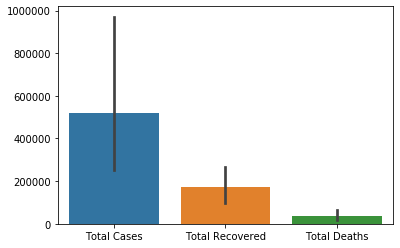

In [22]:
sns.barplot( data=covidData[['Total Cases','Total Recovered','Total Deaths']])

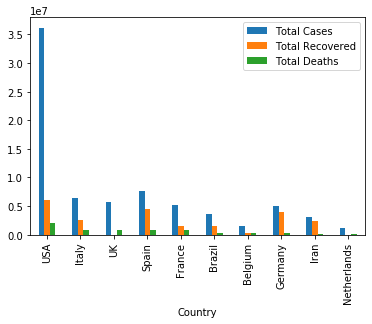

In [23]:
#Top 10 Countries with Deaths descending 

covidData[['Total Cases','Total Recovered','Total Deaths','Country']].sort_values(by=['Total Deaths'],ascending=False).head(10).plot.bar(x='Country')

In [25]:

# Lets Check Outliers in the Dataset 
# IQR score technique to remove Outliers 
Q1 = covidData.quantile(0.25)
Q3 = covidData.quantile(0.75)
IQR = Q3 - Q1
print(IQR.shape)
covidData = covidData[~((covidData < (Q1-1.5 * IQR)) |(covidData > (Q3 + 1.5 * IQR))).any(axis=1)]
covidData.shape


(10,)


(115, 11)

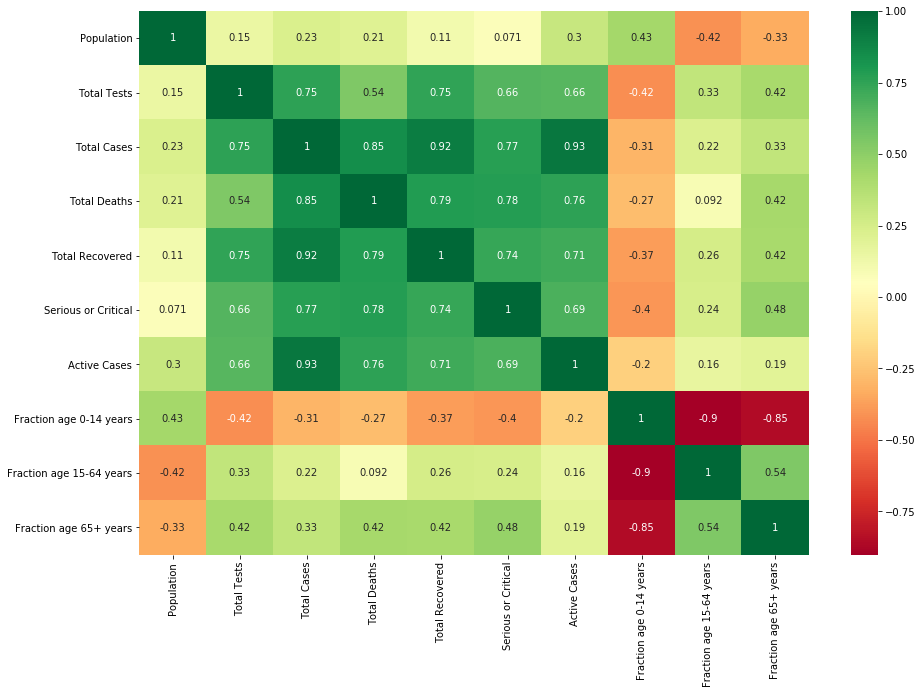

In [26]:
# Correlation of EmpData
plt.figure(figsize=(15,10))
sns.heatmap(data=covidData.corr(),annot=True,cmap="RdYlGn")

In [27]:
# Dropping the negative correlations 
covidData.drop(['Fraction age 0-14 years'],axis=1,inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
covidData['Country'] = labelencoder.fit_transform(covidData['Country'])


In [29]:
x=covidData.drop(['Total Deaths'],axis=1)
x.shape

(115, 9)

In [30]:
y=covidData['Total Deaths']
y=np.array(y).reshape(-1,1)
y.shape

(115, 1)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
pca=PCA()
n={"n_components":range(1,9)}
pcv=GridSearchCV(pca,n,cv=10)
pcv.fit(x,y)
pcv.best_params_

{'n_components': 6}

In [33]:
pca=PCA(n_components=6)
x=pca.fit_transform(x)
x.shape

(115, 6)

In [34]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [35]:
#Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
y_pred = regressor.predict(X_test)

In [37]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

49.7817937127941

In [38]:
df = pd.DataFrame({'Actual': np.array(y_test)[:,0], 'Predicted': y_pred[:,0]})
df.head(10)

,Actual,Predicted
0,579.0,570.360571
1,1150.0,1116.853758
2,31.0,20.158183
3,35.0,57.089685
4,49.0,51.797661
5,574.0,564.728428
6,937.0,930.714517
7,2878.0,2927.277047
8,49.0,57.923329
9,0.0,-14.150642


In [39]:
# Saving the Model for covid death rate
from sklearn.externals import joblib
joblib.dump(regressor,'covid_model.obj')


['covid_model.obj']

# Conclusion
    1) One has to predict Covid Death Rate .
       .Linear Regression
       .handle null for numerical values 
        .Remove the Outliers 
        .Apply PCA
        .Linear Model Prepration 
   